# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/loadenv.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
request_btc_data = requests.get(btc_url)

# Fetch current ETH price
request_eth_data = requests.get(eth_url)

# Format data into JSON
btc_data = request_btc_data.json()
eth_data = request_eth_data.json()

# Print JSON data using json.dumps
print("BTC data \n"+json.dumps(btc_data, indent=4)+"\n")
print("ETH data \n"+json.dumps(eth_data, indent=4))


BTC data 
{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19251687,
            "total_supply": 19251687,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 16754.55,
                    "volume_24h": 16339098490,
                    "market_cap": 322668433754,
                    "percentage_change_1h": 0.198902586339645,
                    "percentage_change_24h": 0.492600932548202,
                    "percentage_change_7d": 0.315574108598397,
                    "percent_change_1h": 0.198902586339645,
                    "percent_change_24h": 0.492600932548202,
                    "percent_change_7d": 0.315574108598397
                },
                "CAD": {
                    "price": 22761.056175,
                    "volume_24h": 22196665298.665,
       

In [6]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price
total_crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your total crypto portfolio is ${total_crypto:0.2f}")

The current value of your 1.2 BTC is $27313.27
The current value of your 5.3 ETH is $8954.63
The current value of your total crypto portfolio is $36267.90


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares (Later for monte carlo forecasts we shall use the weights for AGG and SPY respectively are: [0.8,0.2])
shares_data = {
    "shares": [200, 50]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [8]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
type(api_key)

str

In [9]:
api_key

'AKSTECXU1UVLM8DPCBDO'

In [10]:
secret_key = os.getenv("ALPACA_SECRET_KEY")
secret_key

'sHKOdWqaCQO5IwNhfXrzwJBbqKi6zN1hTlsCy3Il'

In [11]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(api_key)}")
print(f"Alpaca Secret Key type: {type(secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [12]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    secret_key,
    api_version="v2")

In [13]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-03", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

# Reorganize the DataFrame
df_portfolio = df_portfolio.drop(columns = ["trade_count","vwap"]).copy()
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                             open      high    low  close   volume   open   
timestamp                                                                   
2022-01-03 05:00:00+00:00  113.67  113.6753  113.3  113.3  9398873  476.3   

                                                             
                             high     low   close    volume  
timestamp                                                    
2022-01-03 05:00:00+00:00  477.85  473.85  477.71  72604064

In [14]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.3
Current SPY closing price: $477.71


In [15]:
# Compute the current value in dollars of the stock portfolio
agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
total_shares = agg_value + spy_value

# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${agg_value:0.2f}")
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your total shares portfolio is ${total_shares:0.2f}")

The current value of the 200 AGG shares is $22660.00
The current value of the 50 SPY shares is $23885.50
The current value of your total shares portfolio is $46545.50


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_savings = total_crypto
shares_savings = total_shares

# Create savings DataFrame
inv_type = ["crypto", "shares"]
inv_savings = {
    "amount" : [crypto_savings, shares_savings]
}
df_savings = pd.DataFrame(inv_savings, index=inv_type)

# Display savings DataFrame
display(df_savings)

,amount
crypto,36267.897594
shares,46545.500000


<AxesSubplot:title={'center':'Savings: Portfolio Composition'}, ylabel='amount'>

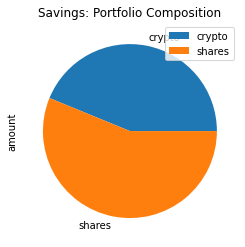

In [17]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings: Portfolio Composition")

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_savings + shares_savings
surplus = total_savings - emergency_fund
shortfall = emergency_fund - total_savings

# Validate saving health
if total_savings > emergency_fund:
    print(f"Yay, you qualify for an emergency fund! In fact; have a surplus of amount {round(surplus,2)} in your emergency fund!")
elif total_savings < emergency_fund:
    print(f"Oops...You do not have enough money in your emergency fund. You are only {round(shortfall,2)} dollars short of an emergency fund!")

Yay, you qualify for an emergency fund! In fact; have a surplus of amount 46813.4 in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG


In [21]:
# Reorganize the DataFrame
df_ticker = df_ticker.drop(columns = ["trade_count","vwap"]).copy()
# Separate ticker data
AGG2 = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY2 = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG2, SPY2],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                              SPY                                       
                             open    high     low     close     volume  
timestamp                                                               
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515  
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142  
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810  
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222  
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns *assuming 252 trading days in a year.
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                           SPY                            \
                          daily_return    open    high     low     close   
timestamp                                                                  
2016-05-02 04:00:00+00:00          NaN  206.92  208.18  206.41  207.9700   
2016-05-03 04:00:00+00:00     0.001853  206.52  206.80  205.28  206.1592   
2016-05-04 04:00:00+00:00     0.000451  204.99  205.85  204.42  205.0100   
2016-05-05 04:00:00+00:00     0.002526  205.56  205.98  204.47  204.9700   
2016-05-06 04:00:00+00:00    -0.001530  204.08  205.77  203.88  205.7200   

                                                   
                              volume daily_return  
timestamp                                          
2016-05-02 04:00:00+00:00   61908515          NaN  
2016-05-03 04:00:00+00:00  106422142    -0.008707  
2016-05-04 04:00:00+00:00   92199810    -0.005574  
2016-05-05 04:00:00+00:00   67597222    -0.000195  
2016-05-06 04:00:00+00:00   89131004     0.003659

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 110.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 120.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 130.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 140.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 150.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 160.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 170.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 180.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 190.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 200.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 210.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 220.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 230.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 240.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 250.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 260.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 270.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 280.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 290.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 300.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 310.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 320.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 330.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 340.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 350.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 360.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 370.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 380.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 390.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 400.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 410.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 420.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 430.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 440.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 450.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 460.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 470.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 480.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 490.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000655,0.998302,0.999577,0.996360,1.001271,1.004423,1.000504,0.998019,1.002355,0.998750,...,0.999292,1.000314,0.996872,0.997514,0.997944,0.993291,0.997532,0.997866,0.999274,1.002203
2,1.001225,0.997545,1.003579,0.998222,1.002996,1.002242,0.993087,1.000655,1.002320,1.004946,...,0.998435,1.000219,0.999580,0.991887,0.996998,0.990054,1.001264,0.996816,1.000035,1.001977
3,1.004737,0.999281,1.004299,0.993154,1.004975,1.007774,0.995280,1.001193,1.002660,1.005983,...,0.997905,1.002640,0.998702,0.989067,0.992411,0.994466,1.000804,0.993107,1.003000,1.000410
4,1.002276,1.004220,1.001001,0.994473,1.002728,1.014046,1.000564,1.003708,1.000566,1.000039,...,0.996573,1.004155,1.000947,0.988965,0.994176,0.999895,0.999638,0.991789,1.003904,0.997984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.230767,3.191447,2.537704,4.918412,3.748548,5.221180,2.156192,3.476830,3.446701,2.515384,...,3.695399,3.704519,2.822268,3.717215,5.196108,4.342612,3.963081,3.612053,3.685670,3.632224
7557,3.230427,3.178959,2.537973,4.886337,3.788810,5.225436,2.170622,3.491811,3.444423,2.522003,...,3.697230,3.697026,2.821975,3.708088,5.189004,4.348004,3.973089,3.604682,3.703143,3.637590
7558,3.225851,3.179183,2.523439,4.881388,3.796352,5.221559,2.178445,3.490911,3.435709,2.538481,...,3.691993,3.702462,2.820484,3.700507,5.188400,4.371457,3.960851,3.620276,3.707887,3.645607
7559,3.221764,3.162813,2.534918,4.897036,3.803156,5.213831,2.187441,3.504272,3.433398,2.535844,...,3.691145,3.686718,2.818762,3.718223,5.192226,4.353880,3.953365,3.616229,3.697005,3.647795


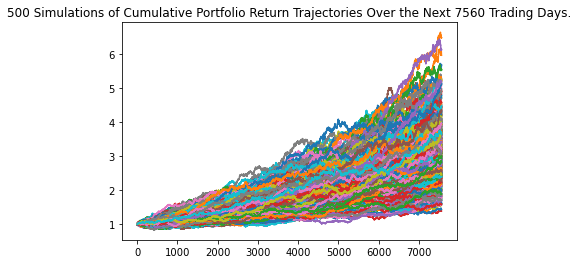

In [25]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

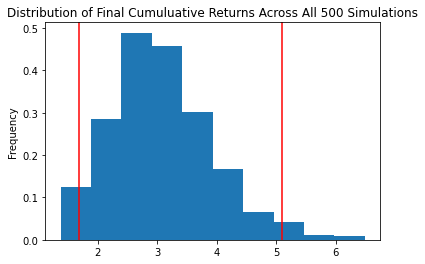

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              3.081158
std               0.849103
min               1.377835
25%               2.486606
50%               2.979286
75%               3.630317
max               6.489399
95% CI Lower      1.696151
95% CI Upper      5.101081
Name: 7560, dtype: float64


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $33923.01 and $102021.62


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $50884.52 and $153032.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                           SPY                            \
                          daily_return    open    high     low     close   
timestamp                                                                  
2016-05-02 04:00:00+00:00          NaN  206.92  208.18  206.41  207.9700   
2016-05-03 04:00:00+00:00     0.001853  206.52  206.80  205.28  206.1592   
2016-05-04 04:00:00+00:00     0.000451  204.99  205.85  204.42  205.0100   
2016-05-05 04:00:00+00:00     0.002526  205.56  205.98  204.47  204.9700   
2016-05-06 04:00:00+00:00    -0.001530  204.08  205.77  203.88  205.7200   

                                                   
                              volume daily_return  
timestamp                                          
2016-05-02 04:00:00+00:00   61908515          NaN  
2016-05-03 04:00:00+00:00  106422142    -0.008707  
2016-05-04 04:00:00+00:00   92199810    -0.005574  
2016-05-05 04:00:00+00:00   67597222    -0.000195  
2016-05-06 04:00:00+00:00   89131004     0.003659

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 110.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 120.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 130.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 140.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 150.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 160.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 170.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 180.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 190.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 200.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 210.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 220.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 230.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 240.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 250.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 260.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 270.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 280.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 290.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 300.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 310.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 320.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 330.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 340.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 350.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 360.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 370.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 380.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 390.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 400.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 410.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 420.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 430.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 440.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 450.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 460.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 470.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 480.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 490.


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


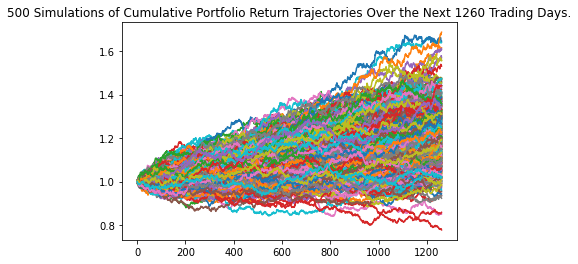

In [32]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

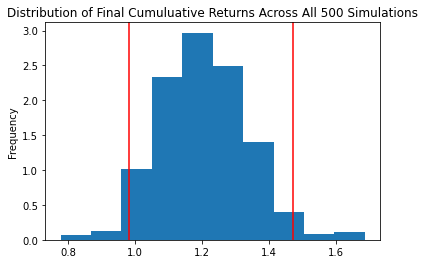

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              1.208125
std               0.133076
min               0.777462
25%               1.112338
50%               1.200682
75%               1.297114
max               1.686864
95% CI Lower      0.981879
95% CI Upper      1.471805
Name: 1260, dtype: float64


/Users/mohjaiswal/Desktop/Unit 5 Homework Asn/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [36]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)
# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58912.74 and $88308.28


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")